In [1]:
import pandas as pd

flight_df = pd.read_csv("flights_historical/train_1.csv")

# reformat departure_time
flight_df['departure_time'] = flight_df['departure_time'].apply(str).apply(lambda x: '0'+x if len(x) != 4 else x)

# reformat the dates
flight_df['month'] = flight_df['month'].apply(lambda x: '0'+x[2:] if len(x) != 4 else x[2:])
flight_df['day_of_month'] = flight_df['day_of_month'].apply(lambda x: '0'+x[2:] if len(x) != 4 else x[2:])
flight_df['day_of_week'] = flight_df['day_of_week'].apply(lambda x: x[2:])
flight_df['is_delayed'] = flight_df['is_delayed'].astype('category').cat.codes

flight_df[['departure_time', 'month', 'day_of_month', 'day_of_week']] = flight_df[['departure_time', 'month', 'day_of_month', 'day_of_week']].apply(pd.to_numeric)

flight_df

,unique_carrier,origin,destination,is_delayed,departure_time,month,day_of_month,day_of_week,distance
0,RQ,ULX,TVQ,0,1143,12,16,5,1587
1,C6,URX,DIE,0,2356,3,22,3,2454
2,WT,HSR,VWP,1,2012,1,14,5,1437
3,NB,UGR,CNY,0,1626,10,14,6,328
4,WT,HTE,RJB,0,1112,5,18,3,957
...,...,...,...,...,...,...,...,...,...
89995,WP,ULQ,MQV,0,2056,6,20,1,448
89996,OZ,FSS,QFT,0,630,12,16,6,618
89997,AG,FPH,MQV,0,1525,1,31,2,83
89998,JG,TVQ,TCA,0,1310,12,6,2,146


In [2]:
# one-hot encoding/dummy variables for categorical data
dummy_df = flight_df.copy()
dummy_df = pd.get_dummies(dummy_df, columns=['unique_carrier', 'origin', 'destination'], drop_first=True)
dummy_df = dummy_df.rename(columns = {'is_delayed': 'target'})

numeric_cols = ['departure_time', 'month', 'day_of_month', 'day_of_week', 'distance']
category_cols = list(set(dummy_df.columns) - set(numeric_cols) - {'target'})
category_cols.sort()

dummy_df

,target,departure_time,month,day_of_month,day_of_week,distance,unique_carrier_BN,unique_carrier_C6,unique_carrier_HH,unique_carrier_HL,...,destination_YMV,destination_YPH,destination_YPU,destination_YQF,destination_YQO,destination_YRT,destination_YTL,destination_YTR,destination_YUQ,destination_YVH
0,0,1143,12,16,5,1587,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2356,3,22,3,2454,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2012,1,14,5,1437,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1626,10,14,6,328,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1112,5,18,3,957,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0,2056,6,20,1,448,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89996,0,630,12,16,6,618,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89997,0,1525,1,31,2,83,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89998,0,1310,12,6,2,146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# train-test split
from sklearn.model_selection import train_test_split

random_seed = 1147

train_df, test_df = train_test_split(dummy_df,test_size=0.20,random_state=random_seed, stratify=dummy_df['target'])

train_df

,target,departure_time,month,day_of_month,day_of_week,distance,unique_carrier_BN,unique_carrier_C6,unique_carrier_HH,unique_carrier_HL,...,destination_YMV,destination_YPH,destination_YPU,destination_YQF,destination_YQO,destination_YRT,destination_YTL,destination_YTR,destination_YUQ,destination_YVH
7439,0,2118,2,14,1,139,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5518,1,1925,5,12,4,1123,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13990,0,700,7,11,1,239,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64850,0,1252,2,21,1,460,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53230,0,937,9,1,5,525,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37756,0,835,4,17,1,954,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46193,0,536,8,8,1,453,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,0,1537,7,29,6,340,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30221,0,747,2,15,3,496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# scaling numeric columns

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(train_df[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X_train, y_train = get_features_and_target_arrays(train_df, numeric_cols, category_cols, scaler)
X_test, y_test = get_features_and_target_arrays(test_df, numeric_cols, category_cols, scaler)

In [5]:
# logistic regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train,y_train)
y_pred_lg = log_reg.predict(X_test)

In [6]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [7]:
# k-nn, n = 1 (single point prediction)

from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

y_pred_knn1 = knn1.predict(X_test)

In [8]:
# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred_knn1)
rmse = sqrt(mse)
rmse

0.5250925844289007

In [10]:
# grid search for best k value
# from sklearn.model_selection import GridSearchCV
# parameters = {"n_neighbors": range(1, 10)}
# gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
# gridsearch.fit(X_train, y_train)

# gridsearch.best_params_

In [11]:
# k-nn, n = 8 (batch prediction)
knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_train, y_train)
y_pred_knn8 = knn8.predict(X_test)

mse_knn8 = mean_squared_error(y_test, y_pred_knn8)
rmse_knn8 = sqrt(mse_knn8)
rmse_knn8

0.44076952909403544

In [12]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dt = dtree.predict(X_test)

In [13]:
# svm
from sklearn import svm
svm = svm.SVC(kernel='linear') 
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [22]:
# simple neural network
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
  Dense(100, activation='tanh', input_shape=(602,)),
  Dense(80, activation='relu'),
  Dense(60, activation='tanh'),
#   Dense(70, activation='relu'),
#   Dense(60, activation='tanh'),
  Dense(40, activation='relu'),
  Dense(30, activation='tanh'),
  Dense(20, activation='relu'),
  Dense(10, activation='tanh'),
  Dense(1, activation='sigmoid'),
])

# model.summary()

model.compile(
  optimizer=Adam(lr=0.1),
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  X_train,
  y_train,
  epochs=20,
  batch_size=10,
  validation_split=0.1
)

y_pred_nn = model.predict(X_test)

model.evaluate(
  X_test,
  y_test
)

Epoch 1/20
6480/6480 [==============================] - 11s 2ms/step - loss: 0.5174 - accuracy: 0.8068 - val_loss: 0.5114 - val_accuracy: 0.8057
Epoch 2/20
6480/6480 [==============================] - 10s 2ms/step - loss: 0.5146 - accuracy: 0.8083 - val_loss: 0.5461 - val_accuracy: 0.8057
Epoch 3/20
6480/6480 [==============================] - 12s 2ms/step - loss: 0.5155 - accuracy: 0.8068 - val_loss: 0.5209 - val_accuracy: 0.8057
Epoch 4/20
6480/6480 [==============================] - 11s 2ms/step - loss: 0.5166 - accuracy: 0.8070 - val_loss: 0.4979 - val_accuracy: 0.8057
Epoch 5/20
6480/6480 [==============================] - 9s 1ms/step - loss: 0.5142 - accuracy: 0.8085 - val_loss: 0.4970 - val_accuracy: 0.8057
Epoch 6/20
6480/6480 [==============================] - 9s 1ms/step - loss: 0.5168 - accuracy: 0.8078 - val_loss: 0.5023 - val_accuracy: 0.8057
Epoch 7/20
6480/6480 [==============================] - 10s 1ms/step - loss: 0.5144 - accuracy: 0.8075 - val_loss: 0.5181 - val_accu

[0.4954504072666168, 0.8095555305480957]

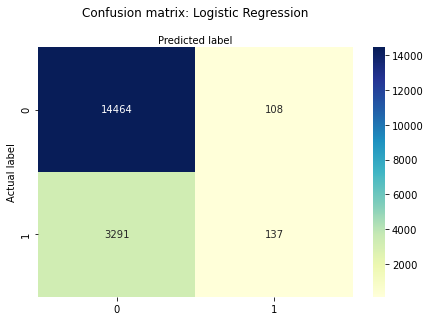

<Figure size 432x288 with 0 Axes>

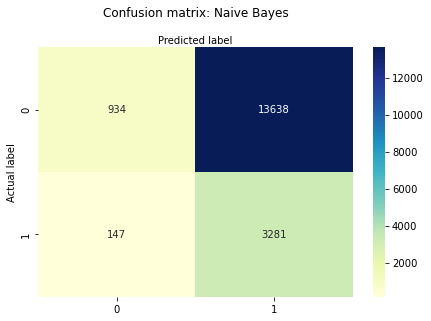

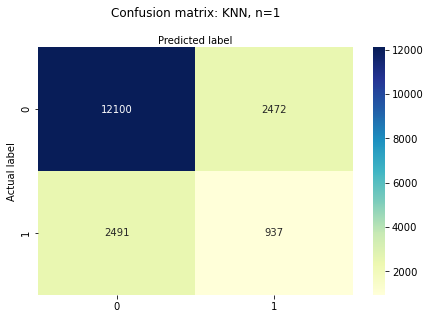

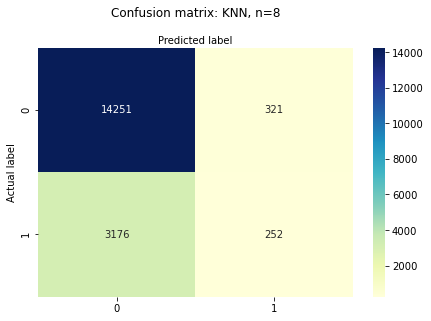

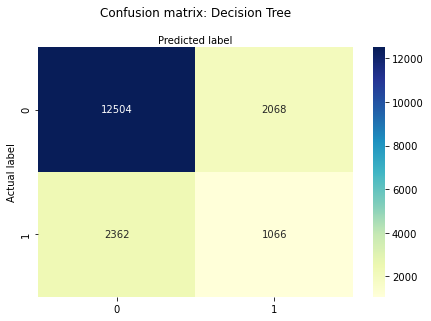

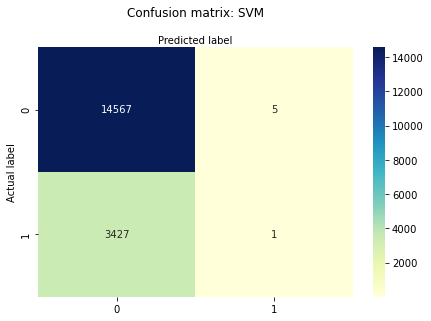

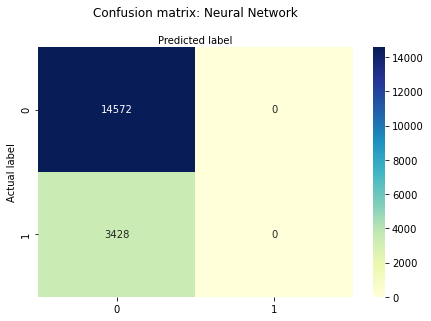

In [24]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def get_confusion_heatmap(matrix, title):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix: ' + title, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig(f'graphs/{title}.png')
    
    return plt.show()

# logistic regression
log_reg_matrix = confusion_matrix(y_test, y_pred_lg)
log_reg_heatmap = get_confusion_heatmap(log_reg_matrix, 'Logistic Regression')
plt.savefig('books_read.png')

# naive bayes
nb_matrix = confusion_matrix(y_test, y_pred_nb)
nb_heatmap = get_confusion_heatmap(nb_matrix, 'Naive Bayes')

# knn1
knn1_matrix = confusion_matrix(y_test, y_pred_knn1)
knn1_heatmap = get_confusion_heatmap(knn1_matrix, 'KNN, n=1')

# knn8
knn8_matrix = confusion_matrix(y_test, y_pred_knn8)
knn8_heatmap = get_confusion_heatmap(knn8_matrix, 'KNN, n=8')

# decision tree
dt_matrix = confusion_matrix(y_test, y_pred_dt)
dt_heatmap = get_confusion_heatmap(dt_matrix, 'Decision Tree')

# svm
svm_matrix = confusion_matrix(y_test, y_pred_svm)
svm_heatmap = get_confusion_heatmap(svm_matrix, 'SVM')

# neural network
new_preds = np.zeros(y_pred_nn.shape)
i = 0

for y in y_pred_nn:
    if y > 0.5:
        new_preds[i] = 1
    else:
        new_preds[i] = 0
    i += 1
    
nn_matrix = confusion_matrix(y_test, new_preds)
nn_heatmap = get_confusion_heatmap(nn_matrix, 'Neural Network')

In [25]:
def get_performance_metrics(y_test, y_pred, title):
    print('Performance metrics for', title)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    print('Accuracy = {:.5f}'.format(acc))
    print('Precision = {:.5f}'.format(precision))
    print('Recall = {:.5f}'.format(recall))
    print('F1 score = {:.5f}'.format(f1score))
    print()
          
    return [acc, precision, recall, f1score]
          
lg_perf = get_performance_metrics(y_test, y_pred_lg, 'Logistic Regression')
nb_perf = get_performance_metrics(y_test, y_pred_nb, 'Naive Bayes')
knn1_perf = get_performance_metrics(y_test, y_pred_knn1, 'KNN, n=1')
knn8_perf = get_performance_metrics(y_test, y_pred_knn8, 'KNN, n=8')
dt_perf = get_performance_metrics(y_test, y_pred_dt, 'Decision Tree')
svm_perf = get_performance_metrics(y_test, y_pred_svm, 'SVM')
nn_perf = get_performance_metrics(y_test, new_preds, 'Simple Neural Network')

Performance metrics for Logistic Regression
Accuracy = 0.81117
Precision = 0.55918
Recall = 0.03996
F1 score = 0.07460

Performance metrics for Naive Bayes
Accuracy = 0.23417
Precision = 0.19392
Recall = 0.95712
F1 score = 0.32250

Performance metrics for KNN, n=1
Accuracy = 0.72428
Precision = 0.27486
Recall = 0.27334
F1 score = 0.27410

Performance metrics for KNN, n=8
Accuracy = 0.80572
Precision = 0.43979
Recall = 0.07351
F1 score = 0.12597

Performance metrics for Decision Tree
Accuracy = 0.75389
Precision = 0.34014
Recall = 0.31097
F1 score = 0.32490

Performance metrics for SVM
Accuracy = 0.80933
Precision = 0.16667
Recall = 0.00029
F1 score = 0.00058

Performance metrics for Simple Neural Network
Accuracy = 0.80956
Precision = 0.00000
Recall = 0.00000
F1 score = 0.00000



C:\Users\user\miniconda3\envs\maxis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


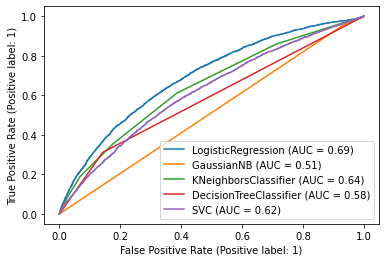

In [28]:
lr_roc = plot_roc_curve(log_reg, X_test, y_test)
nb_roc = plot_roc_curve(nb, X_test, y_test, ax=lr_roc.ax_)
# knn1_roc = plot_roc_curve(knn1, X_test, y_test, ax=lr_roc.ax_)
knn8_roc = plot_roc_curve(knn8, X_test, y_test, ax=lr_roc.ax_)
dtree_roc = plot_roc_curve(dtree, X_test, y_test, ax=lr_roc.ax_)
svm_roc = plot_roc_curve(svm, X_test, y_test, ax=lr_roc.ax_)

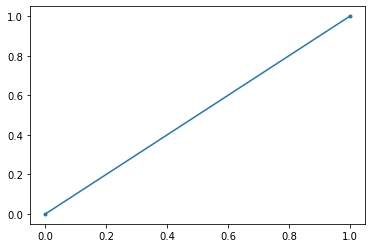

In [33]:
from sklearn.metrics import roc_curve, auc
a, b, c = roc_curve(y_test, new_preds)
auc_keras = auc(a, b)
plt.plot(a, b, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
# nn_roc = plot_roc_curve(model, X_test, y_test, ax=lr_roc.ax_)